In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 10000)

In [2]:
# Load in the dataset
df = pd.read_excel("eletronic_sales.xlsx")
df.head()

,Date,Branch,Sales Agent,Products,Units,Price
0,2014-09-01,Woji,Chinedu,Apple,2,125.00
1,2015-06-17,Woji,Emeka,Apple,5,125.00
2,2015-09-10,Woji,Ibrahim,Lenovo,7,1.29
3,2015-11-17,Woji,Tolu,HP,11,4.99
4,2015-10-31,Woji,Tonye,Lenovo,14,1.29


In [32]:
## What makes a dirty data?
# Missing values

# Duplicates
# inconsistent data columns
# wrong datatype ....>to change datatypes we use ".astype()" ----> to check datatypes we use "dtypes"
# incomplete data

## Why do we need to clean data? We clean data to ensure
# --->Data integrity, accuracy and consistency---->


## Data anaysis pipeline
#1. ETL (Extract, Transform and Load)
#2. creating data model for visualization
#3. building dashboard
#4. Reporting and presentation

## Data Science pipeline
#1. Preliminary analysis
#2. EDA Exploratory data analysis
#3. Data cleaning
#4. Analysis(Data Wrangling)
#5. Data preprocessing and data mining
#6. Building your model(prediction, forcasting, classification, clustering)
#7. Reporting and visualization
#8. Deployment
#9. Maintenance and monitoring
#10.Support and troubleshooting
#----> Please note that from step2 to step5 is an iterative process that is dependent on step 6. Step 6 itself could also be iterative

In [3]:
# View a snapshot of your dataset
df.head()

,Date,Branch,Sales Agent,Products,Units,Price
0,2014-09-01,Woji,Chinedu,Apple,2,125.00
1,2015-06-17,Woji,Emeka,Apple,5,125.00
2,2015-09-10,Woji,Ibrahim,Lenovo,7,1.29
3,2015-11-17,Woji,Tolu,HP,11,4.99
4,2015-10-31,Woji,Tonye,Lenovo,14,1.29


In [4]:
# Do a little bit of feature engineering

# add revenue column
# To create a new column, you start with creating the new columns as a variable name

# units X price = Revenue
# units * price = Revenue

df["Revenue"] = df["Units"] * df["Price"]

#  Round(parameter,2)
df["Revenue(N)"] = round(df["Units"] * df["Price"] * 1000,2)

**Feature Engineering**
* Explanation:

Feature Engineering- This means 3 things, one is useful here and the other two for machine learning. Feature engineering in this context, has to do with creating a new feature or column by combining, extracting or simply doing calculation on an existing column or feature.

In [5]:
# view to see if the changes has been effected
df.head()

,Date,Branch,Sales Agent,Products,Units,Price,Revenue,Revenue(N)
0,2014-09-01,Woji,Chinedu,Apple,2,125.00,250.00,250000.0
1,2015-06-17,Woji,Emeka,Apple,5,125.00,625.00,625000.0
2,2015-09-10,Woji,Ibrahim,Lenovo,7,1.29,9.03,9030.0
3,2015-11-17,Woji,Tolu,HP,11,4.99,54.89,54890.0
4,2015-10-31,Woji,Tonye,Lenovo,14,1.29,18.06,18060.0


In [7]:
# let check data types
df.dtypes

Date           datetime64[ns]
Branch                 object
Sales Agent            object
Products               object
Units                   int64
Price                 float64
Revenue               float64
Revenue(N)            float64
dtype: object

In [8]:
# lets convert the date column to datatime
# Using "pd.to_datetime()"function

# to_datatime()

# datetime()
df["Date"] = pd.to_datetime(df["Date"])

In [9]:
# lets check our data types
df.dtypes

Date           datetime64[ns]
Branch                 object
Sales Agent            object
Products               object
Units                   int64
Price                 float64
Revenue               float64
Revenue(N)            float64
dtype: object

<Axes: xlabel='Data Types', ylabel='Count'>

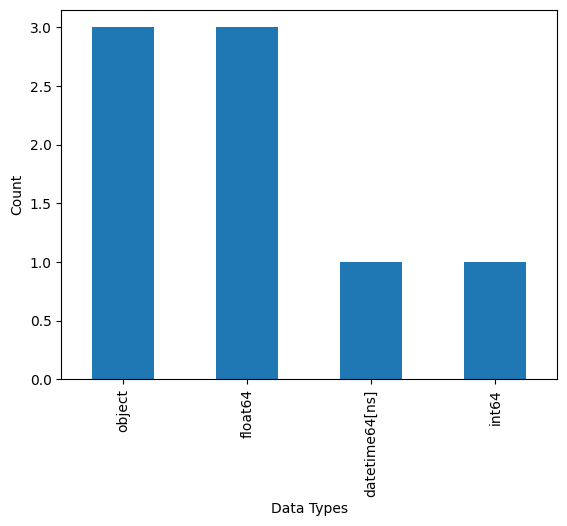

In [39]:
# lets just plot this, its not important though.
df.dtypes.value_counts().plot(kind="bar", xlabel= "Data Types", ylabel= "Count")

In [10]:
# Lets do more feature engineering

# lets work on our datetime to extract the month, year and week name
# Using ".dt.year",".dt.month_name()",".day_name()"

df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month_name()
df["Day"] = df['Date'].dt.day_name()

In [11]:
# df.drop('week', axis=11, inplace=True)
df.head()

,Date,Branch,Sales Agent,Products,Units,Price,Revenue,Revenue(N),Year,Month,Day
0,2014-09-01,Woji,Chinedu,Apple,2,125.00,250.00,250000.0,2014,September,Monday
1,2015-06-17,Woji,Emeka,Apple,5,125.00,625.00,625000.0,2015,June,Wednesday
2,2015-09-10,Woji,Ibrahim,Lenovo,7,1.29,9.03,9030.0,2015,September,Thursday
3,2015-11-17,Woji,Tolu,HP,11,4.99,54.89,54890.0,2015,November,Tuesday
4,2015-10-31,Woji,Tonye,Lenovo,14,1.29,18.06,18060.0,2015,October,Saturday


#2.0 Steps to Analysis
**Note:** This is after you have followed the ETL(Extract Transform Load) frame work, this is you importing your dataset, cleaning and preparing it for analysis

### A. Work on the KPI's (Key performance index of this data)
1. Total units sold
2. Total Revenue
3. Average Revenue per unit
4. Numbers of products
5. Numbers of Sales Agents

### B. Work on the insights by creating models(Note that creating models in data analysis is different from building models in machine learning)
1. Total monthly revenue by Year
2. Total revenue by branch
3. Total revenue by products
4. Total revenue by sales agent
5. Total revenue by week
6. Total revenue by month
7. Trends of sales

### C. Build your dash board
1. Add the title of your analysis.
2. Add the business/company
3. Add your KPI's
4. Add Charts with appropriate labelling
5. Add your slicer if you are working with streamlit or excel or PowerBi or Tableau to make your dashboard interactive(if not, exclude it)

### C. Report your insights
1. Start with the an executive summary briefly explaining what you and briefly introducing the KPI's.
2. Explain your insights in a narative and relatable way using your visuals.

### D. Make recommendation
1. What should the business owner to increase monthly sales
2. Which of the brannches should be given more attention
3. Which products should be removed from the stock, which products should be purchased more
4. Which of the sales agents should be given more incentives/promoted to sales managers position

##A. Work on the KPI's (Key performance index of this data)

In [12]:
# 1. Total units sold
Total_goods_sold = df["Units"].sum()
print(f"Total goods sold: {Total_goods_sold}")

Total goods sold: 2121


In [13]:
# 2. Total revenue
Total_revenue = df["Revenue(N)"].sum()
print(f"Total revenue: N{Total_revenue}")

Total revenue: N19627880.0


In [14]:
# 3. Average Revenue per unit
# using "round()function to approximate to 2 decimal place2
Average_revenue_per_unit = round(Total_revenue / Total_goods_sold, 2)
print(f"Average Revenue per unit: N{Average_revenue_per_unit}")

Average Revenue per unit: N9254.07


In [15]:
# 4. Numbers of products
# using the .nunique() shows the numbers of unique values
Numbers_of_products = df["Products"].nunique()
print(f"Numbers of product: {Numbers_of_products}")

Numbers of product: 5


In [16]:
# 5. Numbers of Sales agents
numbers_of_sales_agents = df["Sales Agent"].nunique()
print(f"Numbers of Sales Agents: {numbers_of_sales_agents}")

Numbers of Sales Agents: 11


##B. work on the insights by creating models and plotting their charts.

In [17]:
# Set index using the data column
df.set_index("Date", inplace=True)
df.head()

,Branch,Sales Agent,Products,Units,Price,Revenue,Revenue(N),Year,Month,Day
Date,,,,,,,,,,
2014-09-01,Woji,Chinedu,Apple,2,125.00,250.00,250000.0,2014,September,Monday
2015-06-17,Woji,Emeka,Apple,5,125.00,625.00,625000.0,2015,June,Wednesday
2015-09-10,Woji,Ibrahim,Lenovo,7,1.29,9.03,9030.0,2015,September,Thursday
2015-11-17,Woji,Tolu,HP,11,4.99,54.89,54890.0,2015,November,Tuesday
2015-10-31,Woji,Tonye,Lenovo,14,1.29,18.06,18060.0,2015,October,Saturday


Class Task1: Calculate the Total Monthly revenue for year 2015 and plot the chart using 3 visualization packages in python

In [18]:
df.Year.unique()

array([2014, 2015], dtype=int32)

In [20]:
sales_2015 = df[df["Year"] == 2015]

In [21]:
# 1.  Filtering
# 2. Grouping
# 3. Visuals

# lets start analysing this dataset for insights

# 1. Monthly revenue in 2015

# step1: Filter for 2015

sales_2015 = df[df['Year'] == 2015]
sales_2015.head()

,Branch,Sales Agent,Products,Units,Price,Revenue,Revenue(N),Year,Month,Day
Date,,,,,,,,,,
2015-06-17,Woji,Emeka,Apple,5,125.00,625.00,625000.0,2015,June,Wednesday
2015-09-10,Woji,Ibrahim,Lenovo,7,1.29,9.03,9030.0,2015,September,Thursday
2015-11-17,Woji,Tolu,HP,11,4.99,54.89,54890.0,2015,November,Tuesday
2015-10-31,Woji,Tonye,Lenovo,14,1.29,18.06,18060.0,2015,October,Saturday
2015-12-21,Woji,Tonye,HP,28,4.99,139.72,139720.0,2015,December,Monday


In [ ]:
# Step2:
# I am using the .sort_index() to arra